In [18]:
# Step 1: use modularity to run clustering by the geodesic distance.
import numpy as np
import pandas as pd
import scipy.io

XYZ_Coord = scipy.io.loadmat('data/XYZcoord1.mat')
# file path: "/" for mac and "\" for winx
XYZ_C = np.array(XYZ_Coord ['XYZ1'])
XYZ_C

array([[ 0.6851533 ,  1.17897583,  3.52402492],
       [ 1.00216962,  1.21572705, 29.32701994],
       [ 1.15125728,  3.32476951, 23.614195  ],
       ...,
       [90.13576705, 15.58773776, 34.16825421],
       [90.73121678, 16.76765189, 13.4218382 ],
       [89.09981586, 18.50040944, 13.39066304]])

In [19]:
XYZ_Edges = pd.read_csv('data/Edges.csv')
# file path: "/" for mac and "\" for winx
XYZ_Edges

,Source,Target,Weight,Type
0,1,5,1.253704,Undirected
1,1,14,1.277093,Undirected
2,1,16,0.345464,Undirected
3,1,17,0.288327,Undirected
4,1,19,0.249381,Undirected
...,...,...,...,...
6031,1995,2000,0.104098,Undirected
6032,1996,1997,0.213520,Undirected
6033,1997,1999,0.154084,Undirected
6034,1997,2000,0.140709,Undirected


In [20]:
XYZ_E = np.array(XYZ_Edges.iloc[:, 0:3].values)
XYZ_E

array([[1.0000000e+00, 5.0000000e+00, 1.2537038e+00],
       [1.0000000e+00, 1.4000000e+01, 1.2770934e+00],
       [1.0000000e+00, 1.6000000e+01, 3.4546397e-01],
       ...,
       [1.9970000e+03, 1.9990000e+03, 1.5408415e-01],
       [1.9970000e+03, 2.0000000e+03, 1.4070934e-01],
       [1.9990000e+03, 2.0000000e+03, 4.2014991e-01]])

In [21]:
#Use the following command to install required package.
#conda install python-louvain networkx
#https://python-louvain.readthedocs.io/en/latest/index.html
#https://networkx.github.io/documentation/stable/index.html
import community
import networkx as nx
import matplotlib.pyplot as plt

#Use pre-defined linkage (Edges.csv) to constructure whole network
G = nx.Graph()
for i in range(0, len(XYZ_E)):    
    e = ( str(int(XYZ_E[i,0])), str(int(XYZ_E[i,1])), XYZ_E[i,2] )
    G.add_weighted_edges_from([(e)])    

ModuleNotFoundError: No module named 'community'

In [7]:
partition = community.best_partition(G)
size = float(len(set(partition.values())))
print("community:", size)
mod = community.modularity(partition,G)
print("modularity:", mod)

NameError: name 'community' is not defined

In [8]:
#assign node color based on community in network
for com in set(partition.values()) :
    print("Community", com)
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    print(members)
values = [partition.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size = 30, with_labels = False)
plt.show()    

NameError: name 'partition' is not defined

In [9]:
#assign data point color based on community in realspace
label = np.zeros((len(XYZ_C),1))
for j in set(partition.values()) :
    for i in range(len(XYZ_C)) :
        if partition[str(i+1)] == j :            
            label[i] =  j
labelRE = np.reshape(label, len(XYZ_C))            

NameError: name 'XYZ_C' is not defined

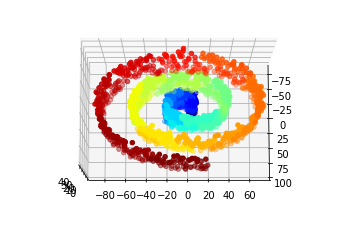

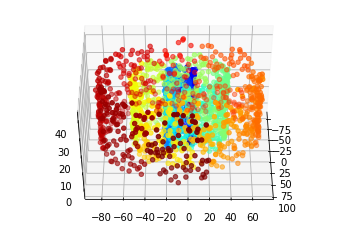

In [8]:
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)

In [ ]:
dot = []
community = []
clr = []
for j in range(len(XYZ_C)):
    if j % 50 == 0: 
        community.append(partition[str(j+1)])
        dot.append(j)
        clr.append(labelRE[j])
#testdot = [i for i in range(1,2001)]
plt.figure(figsize=(10,10))
plt.scatter(dot, community, s=60, c =clr, cmap = plt.get_cmap('jet'))
#plt.scatter(testdot, partition.values(), s=3, c =labelRE, cmap = plt.get_cmap('jet'))
plt.xlim(0,2000)
plt.xlabel("atoms number", fontsize=20)
plt.ylim(0, )
plt.ylabel("community number", fontsize=20)
plt.grid(True)
plt.show()

In [1]:
# Step 3: use k-mean to run clustering again according to the result of Step 1.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= int(size))
kmeans.fit(XYZ_C)

NameError: name 'XYZ_C' is not defined

In [ ]:
label = np.zeros((len(XYZ_C),1))
for j in range(int(size)):
    for i in range(len(XYZ_C)):
        if kmeans.labels_[i] == j:
            label[i] = j
labelK = np.reshape(label, len(XYZ_C))

In [11]:
fig3 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelK
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)

fig4 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelK
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)

NameError: name 'plt' is not defined

In [ ]:
dot = []
community = []
clr = []
for j in range(len(XYZ_C)):
    if j % 50 == 0: 
        community.append(kmeans.labels_[j])
        dot.append(j)
        clr.append(labelK[j])
plt.figure(figsize=(10,10))
plt.scatter(dot, community, s = 60, c = clr, cmap = plt.get_cmap('jet'))
plt.xlim(0,2000)
plt.xlabel("atoms number", fontsize=20)
plt.ylim(0, )
plt.ylabel("community number", fontsize=20)
plt.grid(True)
plt.show()